## Predictions on Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### loading the train data

In [2]:
df_train = pd.read_csv('../data/outliers_train.csv')
df_train.drop('Unnamed: 0', axis = 1, inplace = True)
df_train.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2.0,3897.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7.0,7662.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19.0,13882.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5.0,6218.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4.0,13302.0


In [3]:
X = df_train.drop('price', axis = 1)
y = df_train['price']

In [4]:
X.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2.0
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7.0
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19.0
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5.0
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4.0


In [5]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: price, dtype: float64

In [6]:
print(f"{X.shape} :: {y.shape}")

(10681, 15) :: (10681,)


### making then train and test data from df_train

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(8010, 15) : (8010,) :: (2671, 15) : (2671,)


### loading the df_test as new test data

In [9]:
X_test_new = pd.read_csv('../data/outliers_test.csv')
X_test_new.drop('Unnamed: 0', axis = 1, inplace = True)
X_test_new.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,4,4,1.0,0,1,0,1,6,6,2019,17,30,4,25,10.0
1,3,3,1.0,1,0,0,1,12,5,2019,6,20,10,20,4.0
2,4,4,1.0,0,1,0,0,21,5,2019,19,15,19,0,23.0
3,4,4,1.0,0,0,1,1,21,5,2019,8,0,21,0,13.0
4,2,2,3.0,0,0,1,1,24,6,2019,23,55,2,45,2.0


In [10]:
X_test_new.shape

(2670, 15)

## Predictions

In [14]:
### will be doing the same as I did with the normal data, will be testing for the datasets from df_train
### checking the graphs and then making the predictions on the new unseen data which is X_test_new in our case

### graphs and metrices

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [12]:
def metrices(y_pred, y_test) : 
    print(f"R2 score : {r2_score(y_pred, y_test)}")
    print(f"mean_absolute_error : {mean_absolute_error(y_pred, y_test)}")
    print(f"root_mean_squared_error : {root_mean_squared_error(y_pred, y_test)}")
    print(f"mean_squared_error : {mean_squared_error(y_pred, y_test)}")

In [13]:
def plot_graphs(y_test, y_pred):
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linewidth=2, label='Perfect Prediction Line')
    plt.title(f'Actual vs Predicted Value ')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.legend()
   
    plt.subplot(1, 2, 2)
    plt.plot(y_test, label='Actual', color='blue', marker='o')
    plt.plot(y_pred, label='Predicted', color='red', marker='x')
    plt.title(f'Trend Comparison')
    plt.xlabel('Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.show()

### 1. Linear regression 

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lr = lr.predict(X_test)

R2 score : 0.3166643063285306
mean_absolute_error : 1978.0808028029983
root_mean_squared_error : 2723.8431441668695
mean_squared_error : 7419321.474024858


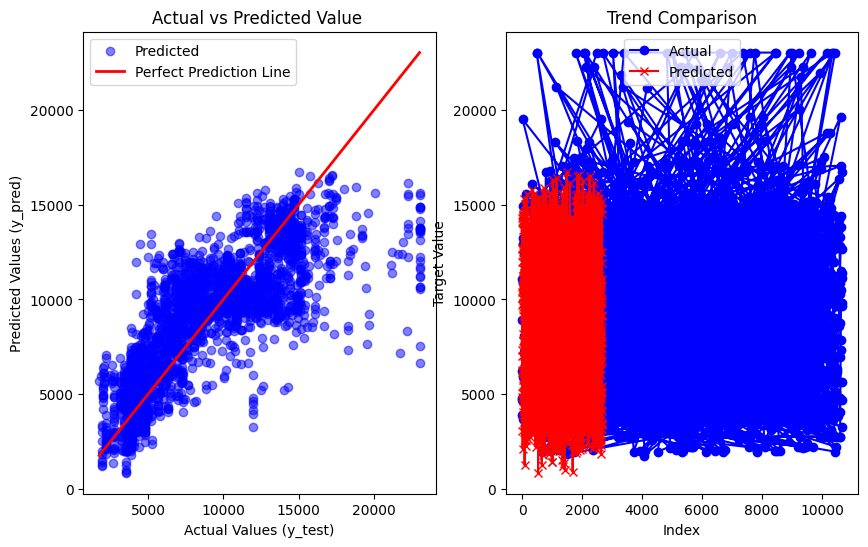

In [17]:
metrices(y_pred_lr, y_test)
plot_graphs(y_test, y_pred_lr)

### 2. Suppert vector regressor

In [18]:
from sklearn.svm import SVR
svr = SVR()

In [19]:
svr.fit(X_train, y_train)

SVR()

In [20]:
y_pred_svr = svr.predict(X_test)

R2 score : -439524553.4597794
mean_absolute_error : 3572.519021637961
root_mean_squared_error : 4364.216457897384
mean_squared_error : 19046385.29138239


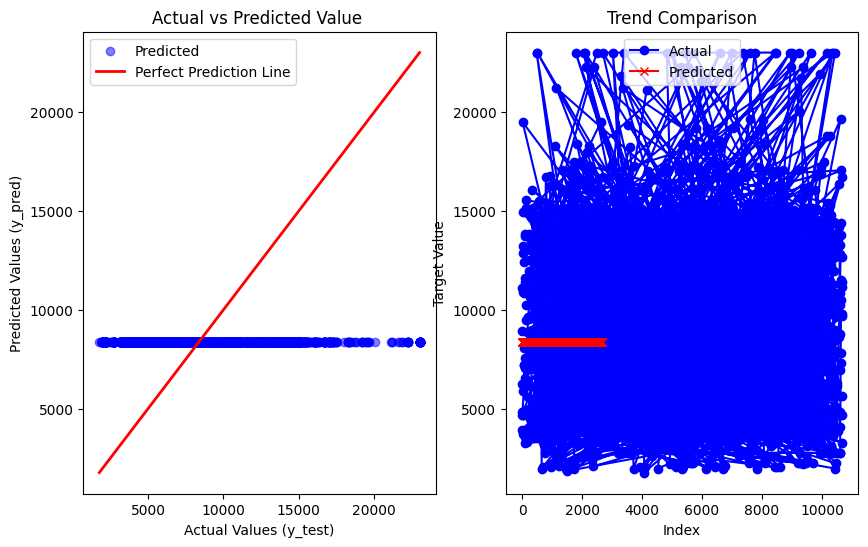

In [21]:
metrices(y_pred_svr, y_test)
plot_graphs(y_test, y_pred_svr)

### 3. KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [23]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

R2 score : 0.45096544276240647
mean_absolute_error : 1778.4566828903032
root_mean_squared_error : 2638.4034380746584
mean_squared_error : 6961172.702044178


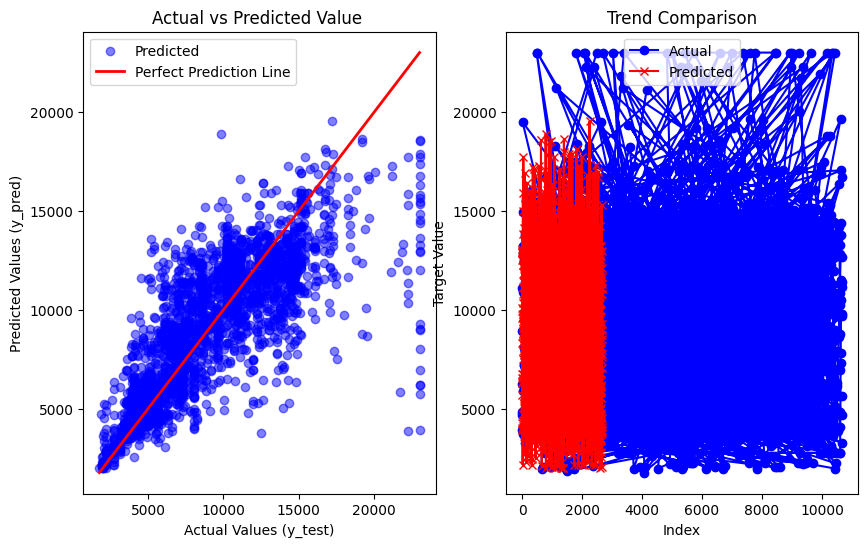

In [24]:
y_pred_knn = knn.predict(X_test)
metrices(y_pred_knn, y_test)
plot_graphs(y_test, y_pred_knn)

### 4. Decision tree regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [26]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

R2 score : 0.8657223226696176
mean_absolute_error : 727.2692499688006
root_mean_squared_error : 1598.7191361768237
mean_squared_error : 2555902.876377969


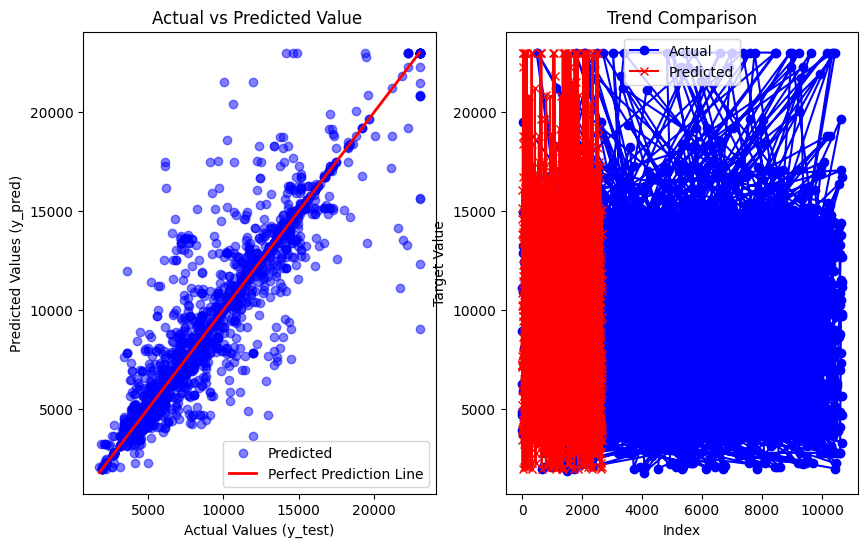

In [27]:
y_pred_dtr = dtr.predict(X_test)
metrices(y_pred_dtr, y_test)
plot_graphs(y_test, y_pred_dtr)

### 5. Random forest regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [29]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

R2 score : 0.9079541682353826
mean_absolute_error : 651.4983244626021
root_mean_squared_error : 1263.607606257044
mean_squared_error : 1596704.1825906564


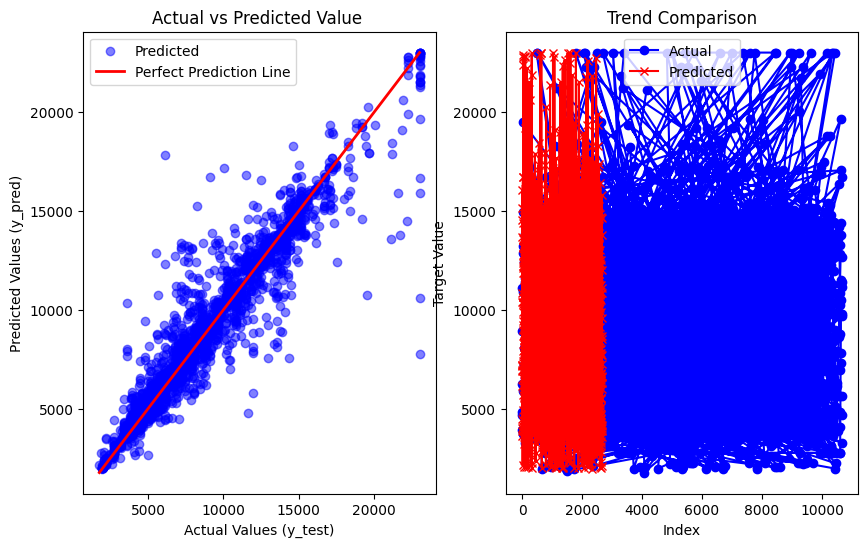

In [30]:
y_pred_rfr = rfr.predict(X_test)
metrices(y_pred_rfr, y_test)
plot_graphs(y_test, y_pred_rfr)

### 6. Adaboost regressor

In [31]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

In [32]:
abr.fit(X_train, y_train)

AdaBoostRegressor()

R2 score : 0.39507880850555266
mean_absolute_error : 1966.3384812205472
root_mean_squared_error : 2491.7189846893125
mean_squared_error : 6208663.498661138


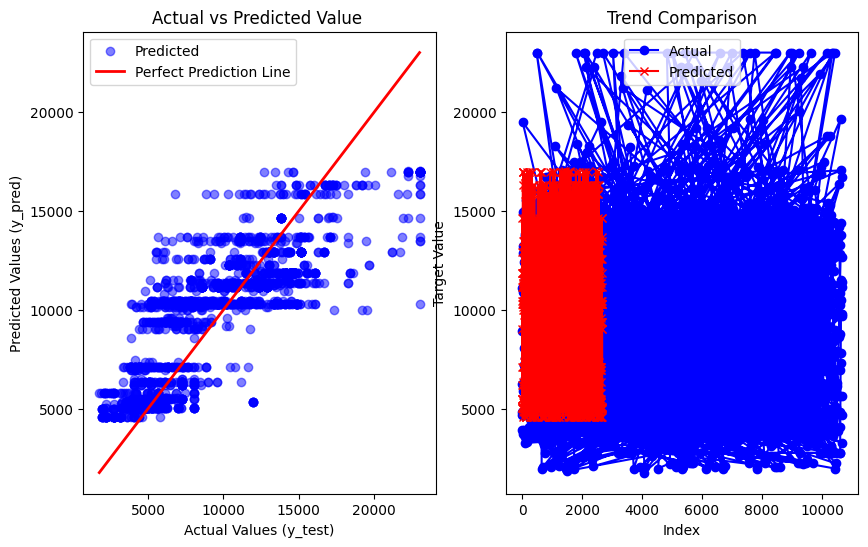

In [33]:
y_pred_abr = abr.predict(X_test)
metrices(y_pred_abr, y_test)
plot_graphs(y_test, y_pred_abr)

### 7. Gradient boost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [36]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

R2 score : 0.7508379860657335
mean_absolute_error : 1274.7130997626982
root_mean_squared_error : 1857.9870627271466
mean_squared_error : 3452115.92526145


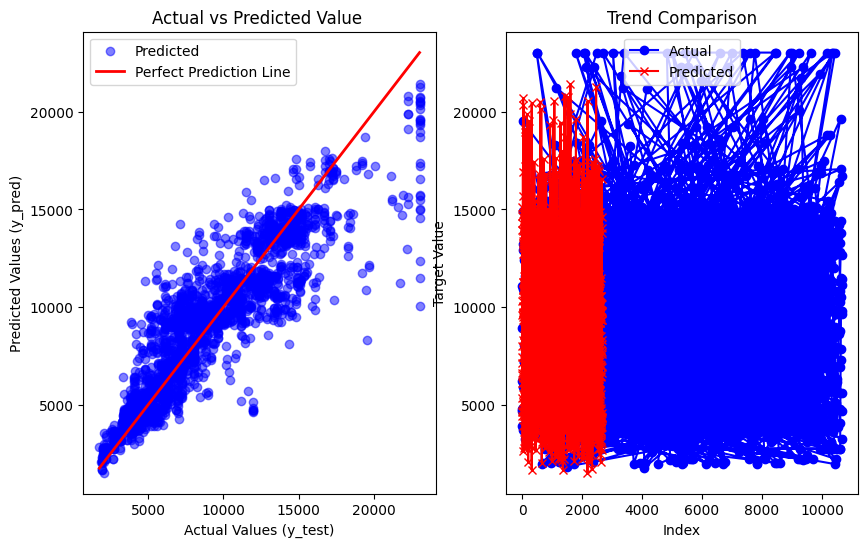

In [37]:
y_pred_gbr = gbr.predict(X_test)
metrices(y_pred_gbr, y_test)
plot_graphs(y_test, y_pred_gbr)

## Predictions : X_test_new

In [48]:
### this time on X_test_new instead of using the 2 algorithms like last time, 
### we will only use Random forest as the baseline and then compare the results
### it's because after removing the outliers the results are more clear cut

### Random forest : baseline

In [38]:
y_pred_rfr_new = rfr.predict(X_test_new)

In [39]:
y_pred_rfr_new

array([14709.23,  4226.  , 12898.  , ..., 15669.5 , 13274.69,  7548.32],
      shape=(2670,))

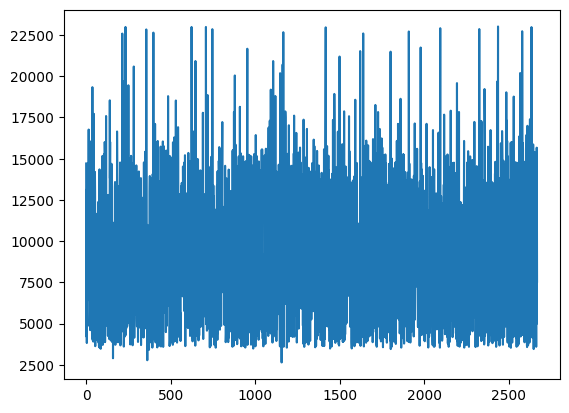

In [40]:
plt.plot(y_pred_rfr_new)

### defining a general function to save time

In [41]:
def predict_and_plot(algo, X_test_new, y_pred_rfr_new) : 
    y_pred_algo = algo.predict(X_test_new)
    print(f"algorithm : {algo}")
    metrices(y_pred_algo, y_pred_rfr_new)
    plot_graphs(y_pred_rfr_new, y_pred_algo)

### 1. Linear regression

algorithm : LinearRegression()
R2 score : 0.43227938578797775
mean_absolute_error : 1850.7455155089324
root_mean_squared_error : 2484.5794362541637
mean_squared_error : 6173134.975057057


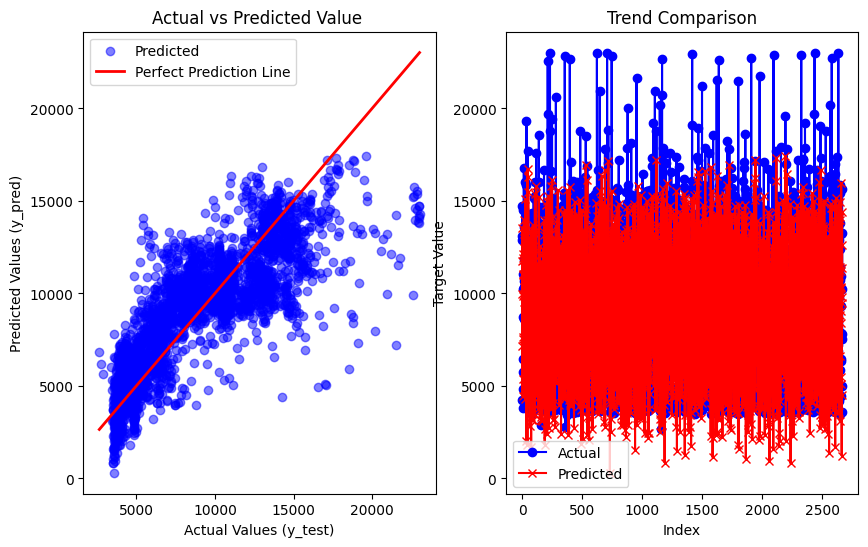

In [42]:
predict_and_plot(lr, X_test_new, y_pred_rfr_new)

### 2. SVR

algorithm : SVR()
R2 score : -350847652.78849554
mean_absolute_error : 3422.3786661573445
root_mean_squared_error : 4150.07637774405
mean_squared_error : 17223133.94110917


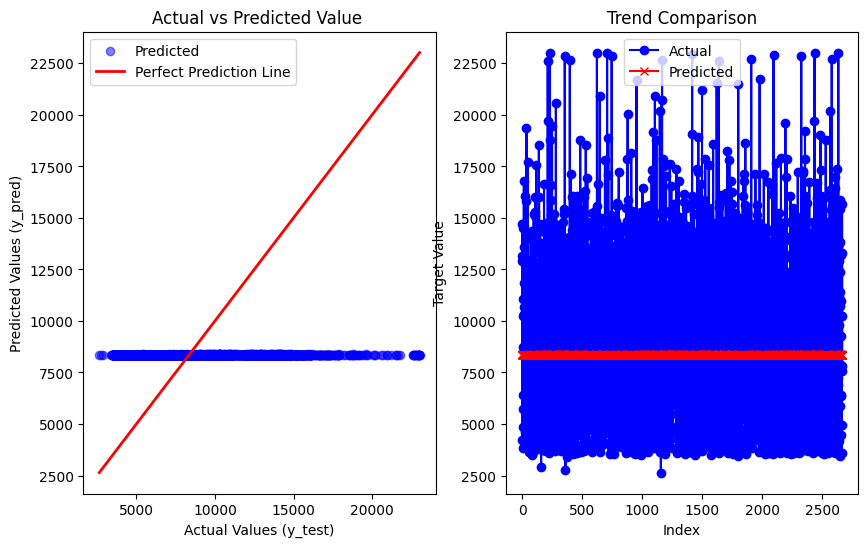

In [43]:
predict_and_plot(svr, X_test_new, y_pred_rfr_new)

### 3. KNN 

algorithm : KNeighborsRegressor()
R2 score : 0.5766219525448872
mean_absolute_error : 1592.179103360653
root_mean_squared_error : 2352.2887966765375
mean_squared_error : 5533262.582969952


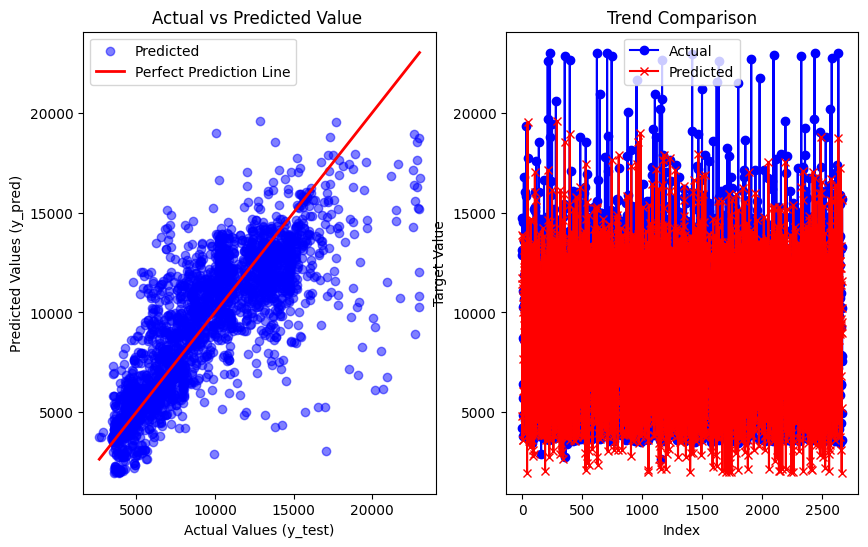

In [45]:
predict_and_plot(knn, X_test_new, y_pred_rfr_new)

### 4. Decision tree regressor

algorithm : DecisionTreeRegressor()
R2 score : 0.938942307208242
mean_absolute_error : 544.8699461934757
root_mean_squared_error : 1074.9558121246564
mean_squared_error : 1155529.9980205796


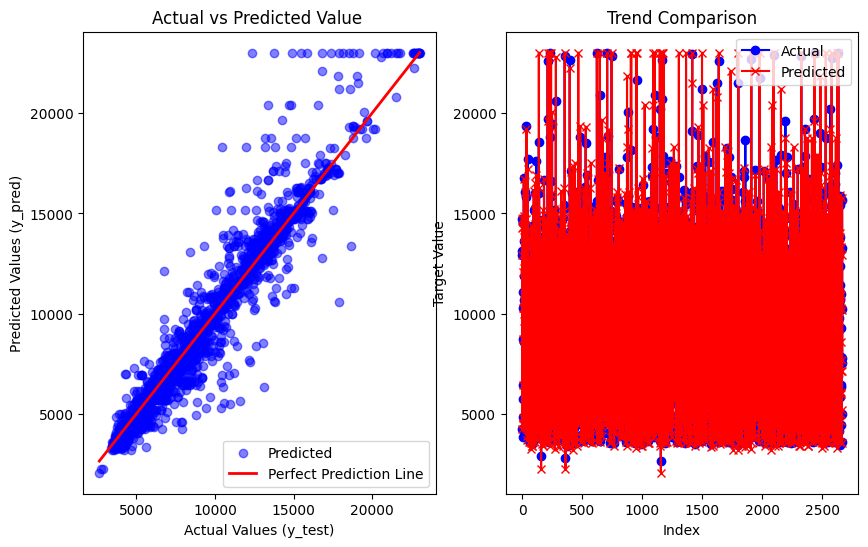

In [46]:
predict_and_plot(dtr, X_test_new, y_pred_rfr_new)

### 5. Adaboost regressor

algorithm : AdaBoostRegressor()
R2 score : 0.5362986428638286
mean_absolute_error : 1743.2018427097562
root_mean_squared_error : 2146.5712117670428
mean_squared_error : 4607767.96718703


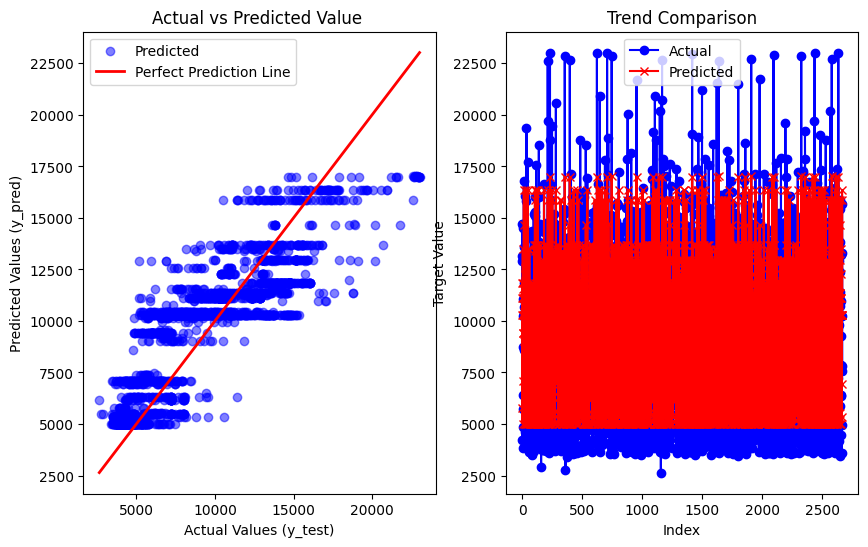

In [47]:
predict_and_plot(abr, X_test_new, y_pred_rfr_new)

### 6. Gradient boost regressor

algorithm : GradientBoostingRegressor()
R2 score : 0.8388424946665889
mean_absolute_error : 1025.991283861784
root_mean_squared_error : 1445.583840825304
mean_squared_error : 2089712.6408552374


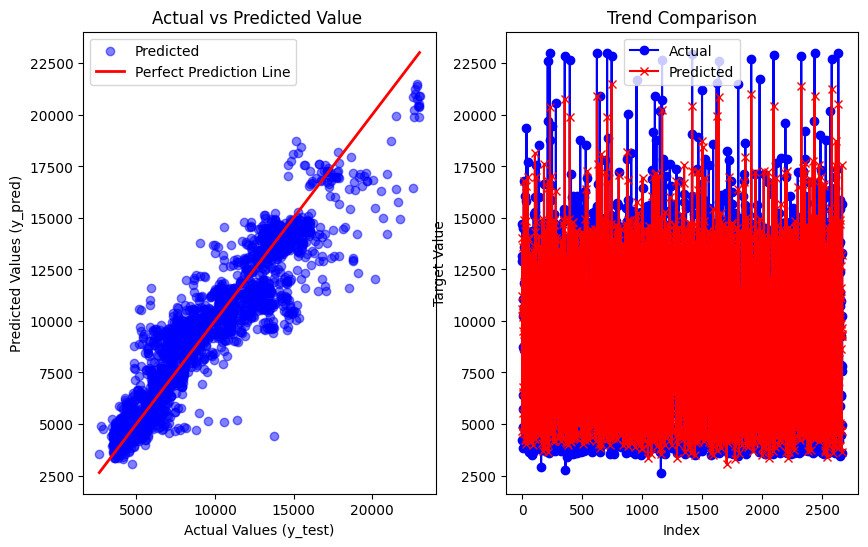

In [48]:
predict_and_plot(gbr, X_test_new, y_pred_rfr_new)